## Analysis

1. Data Flow & sources
2. Database set-up
3. Movies per year
4. Movies without budget
5. Rev/Budger per year (line graph?)
6. % of movies with minorities in lead role vs. A-list celebrities per year (trend is increasing or dec)
7. Box office for minorities for the decade
8. Box office for A-list for the decade
9. 

In [1]:
from copy import deepcopy

In [8]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM details JOIN movie_actors ON details.id = movie_actors.id""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]

cnx.commit()
c.close()
cnx.close()

In [7]:
import config
import mysql.connector
import pandas as pd

In [9]:
df.head()

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Jessica Alba,non-white
1,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Joseph Gordon-Levitt,white
2,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Josh Brolin,white
3,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Mickey Rourke,white
4,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,39407616.0,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Rosario Dawson,non-white


In [10]:
df['year'] = df['release_date'].map(lambda x : x.year)

In [11]:
df.groupby(['year']).mean()

,id,budget,revenue,popularity,vote_average,vote_count,runtime,id
year,,,,,,,,
2010,43801.956638,2.405078e+07,6.086184e+07,9.515381,6.278747,1059.725910,102.331539,43801.956638
2011,65716.227128,2.294029e+07,6.023628e+07,9.376359,6.258777,1037.480851,100.720745,65716.227128
2012,97752.129580,2.191142e+07,6.713908e+07,9.669204,6.214923,1188.029740,103.197643,97752.129580
2013,152396.146381,2.358775e+07,6.562328e+07,10.335075,6.327346,1378.318499,104.745161,152396.146381
2014,222709.571201,2.190417e+07,6.989217e+07,11.666914,6.378321,1515.465462,104.333156,222709.571201
2015,288206.057219,2.114029e+07,7.335409e+07,10.769588,6.232941,1317.729412,104.694010,288206.057219
2016,328134.000000,2.593913e+07,7.629630e+07,11.506653,6.328759,1564.056948,107.254712,328134.000000
2017,401646.344532,8.973413e+06,2.390381e+07,9.822560,6.231022,513.690493,102.561555,401646.344532
2018,439251.416357,2.662842e+07,9.359867e+07,16.013885,6.459851,1272.011152,108.644195,439251.416357


In [12]:
df['budgetm'] = df['budget'].map(lambda x :x/1000000)

In [13]:
df

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity,year,budgetm
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Jessica Alba,non-white,2014,65.0
1,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Joseph Gordon-Levitt,white,2014,65.0
2,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Josh Brolin,white,2014,65.0
3,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Mickey Rourke,white,2014,65.0
4,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Rosario Dawson,non-white,2014,65.0
5,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Chris Evans,white,2011,140.0
6,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hayley Atwell,white,2011,140.0
7,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hugo Weaving,non-white,2011,140.0
8,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Sebastian Stan,white,2011,140.0
9,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Tommy Lee Jones,white,2011,140.0


In [14]:
df['revm'] = df['revenue'].map(lambda x : x/1000000)

In [15]:
# df.isna().sum()

In [16]:
sum(df.budget == 0)


6451

In [17]:
sum(df.budget >0)

9297

In [18]:
len(df)

15748

In [19]:
sum(df.budget == 0)/len(df)


0.40963931927863856

In [20]:
df['production_country'].value_counts()

US        10393
non-US     5355
Name: production_country, dtype: int64

In [21]:
df = df[df['production_country'] == 'US']

In [22]:
df

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity,year,budgetm,revm
0,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Jessica Alba,non-white,2014,65.0,39.407616
1,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Joseph Gordon-Levitt,white,2014,65.0,39.407616
2,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Josh Brolin,white,2014,65.0,39.407616
3,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Mickey Rourke,white,2014,65.0,39.407616
4,189,tt0458481,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,19.302,2014-08-20,6.3,2314,102.0,US,en,189,Rosario Dawson,non-white,2014,65.0,39.407616
5,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Chris Evans,white,2011,140.0,370.569774
6,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hayley Atwell,white,2011,140.0,370.569774
7,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Hugo Weaving,non-white,2011,140.0,370.569774
8,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Sebastian Stan,white,2011,140.0,370.569774
9,1771,tt0458339,Captain America: The First Avenger,140000000.0,3.705698e+08,18.373,2011-07-22,6.9,13443,124.0,US,en,1771,Tommy Lee Jones,white,2011,140.0,370.569774


In [23]:
df['language'].value_counts()

en    10342
es       15
ja       10
fr       10
it        5
de        5
el        4
zh        2
Name: language, dtype: int64

In [24]:
df[df['language'] != 'en']

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,actor,ethnicity,year,budgetm,revm
380,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Adrien Brody,white,2010,14.00,0.000000
381,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Elsa Pataky,None,2010,14.00,0.000000
382,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Emmanuelle Seigner,None,2010,14.00,0.000000
383,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Robert Miano,None,2010,14.00,0.000000
384,29159,tt1107816,Giallo,14000000.0,0.0,6.046,2010-03-13,4.0,66,92.0,US,it,29159,Valentina Izumi,None,2010,14.00,0.000000
1684,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Hayley Kiyoko,non-white,2010,0.00,0.000000
1685,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Kate Melton,None,2010,0.00,0.000000
1686,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Nick Palatas,None,2010,0.00,0.000000
1687,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Robbie Amell,white,2010,0.00,0.000000
1688,47533,tt1618435,Scooby-Doo! Curse of the Lake Monster,0.0,0.0,8.414,2010-10-15,5.6,188,79.0,US,de,47533,Ted McGinley,None,2010,0.00,0.000000


In [25]:
df = df[df['language'] == 'en']

In [26]:
df['revm'].value_counts()

0.000000       3184
3.566225          5
894.027543        5
471.222889        5
212.902372        5
1091.405097       5
0.049970          5
192.330738        5
69.929545         5
55.003890         5
0.011774          5
299.457024        5
201.585328        5
86.362372         5
3.538446          5
132.274484        5
4.077333          5
97.594140         5
484.635760        5
8.784318          5
16.872691         5
3.665069          5
5.400000          5
45.236543         5
0.169209          5
79.700000         5
0.382946          5
216.485654        5
37.930465         5
543.514353        5
               ... 
51.029361         5
18.850674         5
56.303596         5
3.317662          5
112.483764        5
752.600867        5
0.052604          5
40.547440         5
7.644937          5
229.147509        5
187.361754        5
0.004526          5
1.710528          5
73.983359         5
100.176000        5
25.182929         5
3.099314          5
0.851517          5
51.854875         5


In [27]:
import seaborn as sns

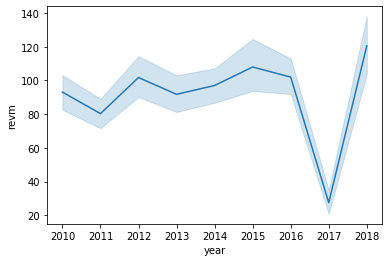

In [28]:
sns.lineplot(x = 'year', y = 'revm', data=df)

In [29]:
df.groupby('year').mean()

,id,budget,revenue,popularity,vote_average,vote_count,runtime,id,budgetm,revm
year,,,,,,,,,,
2010,37636.753725,3.496699e+07,9.308611e+07,10.623245,6.161788,1533.358457,98.822086,37636.753725,34.966992,93.086112
2011,62818.937646,3.034543e+07,8.029411e+07,9.914027,6.134139,1303.533125,99.130164,62818.937646,30.345430,80.294113
2012,87130.027539,3.222701e+07,1.017196e+08,10.647281,6.121515,1725.110155,101.124785,87130.027539,32.227005,101.719567
2013,137769.425566,3.242103e+07,9.175406e+07,11.252084,6.194417,1816.827670,102.870550,137769.425566,32.421028,91.754058
2014,211147.084927,2.896825e+07,9.700306e+07,12.870615,6.283703,1895.452946,102.951033,211147.084927,28.968248,97.003058
2015,269673.764954,3.016824e+07,1.079735e+08,12.062067,6.118871,1810.739680,103.663858,269673.764954,30.168240,107.973460
2016,310579.740586,3.486067e+07,1.019551e+08,12.320757,6.258996,2013.543933,107.222689,310579.740586,34.860669,101.955091
2017,391546.471376,1.144080e+07,2.748430e+07,10.120649,6.109379,662.716200,100.002436,391546.471376,11.440802,27.484299
2018,422486.272277,3.452405e+07,1.205131e+08,17.483559,6.420792,1575.326733,108.386139,422486.272277,34.524052,120.513064


In [30]:
sum(df.revm == 0)/len(df)


0.3078708180235931

In [31]:
len(df[(df['revm'] == 0) | (df['budget'] == 0)])/len(df)



0.4065944691549023

In [32]:
len(df)

10342

In [33]:
len(df[(df['revm'] == 0) | (df['budget'] == 0)])

4205

In [34]:
major_movies = df[(df['revm'] != 0) & (df['budget'] != 0)]

In [35]:
len(major_movies)

6137

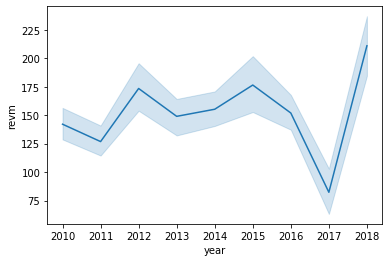

In [36]:
sns.lineplot(x = 'year', y = 'revm', data=major_movies)

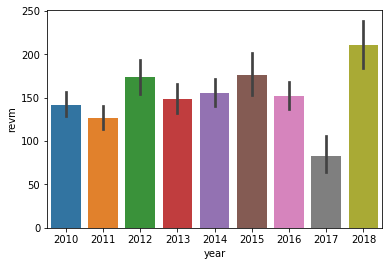

In [37]:
sns.barplot(x='year', y='revm', data= major_movies)

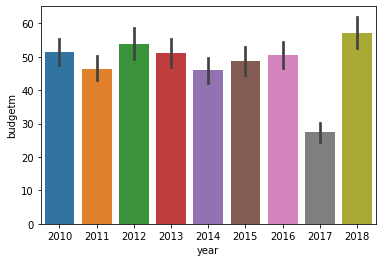

In [38]:
sns.barplot(x='year', y='budgetm', data= major_movies)

In [39]:
import config
import mysql.connector
import pandas as pd

In [40]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM actors""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [41]:
df.nonwhite.value_counts(normalize=True)

white        0.889489
non-white    0.110511
Name: nonwhite, dtype: float64

In [42]:
most_common_ethnicities = df.groupby(['ethnicity', 'nonwhite']).count().sort_values(by='name', ascending = False)

In [43]:
most_common_ethnicities[:25]

,,name
ethnicity,nonwhite,
English,white,1063
German,white,653
Irish,white,649
Scottish,white,548
Ashkenazi Jewish,white,287
Welsh,white,208
French,white,206
Northern Irish,white,179
Italian,white,172


In [44]:
number_ethnicities = df.count()['ethnicity']
number_ethnicities

5927

In [45]:
number_actors = df['name'].nunique()
number_actors

1909

In [46]:
ethnicities_per_actor = round(number_ethnicities/number_actors)
ethnicities_per_actor

3.0

In [47]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT DISTINCT a.name, IF(ISNULL(a1.name), a2.nonwhite, a1.nonwhite) AS minority FROM actors a
LEFT JOIN (SELECT DISTINCT name, nonwhite FROM actors WHERE nonwhite='non-white') a1
ON a.name = a1.name
LEFT JOIN (SELECT DISTINCT name, nonwhite FROM actors WHERE nonwhite='white') a2
ON a.name = a2.name""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [48]:
df.minority.value_counts()

white        1408
non-white     501
Name: minority, dtype: int64

In [49]:
df.sample(10)

,name,minority
1335,Will Poulter,white
105,Tom Welling,white
731,Garrett Hedlund,white
1731,Crispin Glover,white
1906,Hayden Szeto,non-white
1872,Charlie Tahan,non-white
509,Aaron Paul,white
448,David Spade,white
1250,Gabriel Bateman,white
180,Michelle Dockery,white


In [50]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * FROM filtered_movies""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [51]:
# df

In [52]:
df['budgetm'] = df['budget'].map(lambda x :x/1000000)

In [53]:
df['revm'] = df['revenue'].map(lambda x :x/1000000)

In [54]:
# df

In [55]:
df['year'] = df['release_date'].map(lambda x : x.year)

In [56]:
df

,movie_name,budget,revenue,release_date,vote_average,vote_count,runtime,production_country,language,actor_name,ethnicity,budgetm,revm,year
0,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Jessica Alba,non-white,65.000000,39.407616,2014
1,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Joseph Gordon-Levitt,white,65.000000,39.407616,2014
2,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Josh Brolin,white,65.000000,39.407616,2014
3,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Mickey Rourke,white,65.000000,39.407616,2014
4,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Rosario Dawson,non-white,65.000000,39.407616,2014
5,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Chris Evans,white,140.000000,370.569774,2011
6,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hayley Atwell,white,140.000000,370.569774,2011
7,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hugo Weaving,non-white,140.000000,370.569774,2011
8,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Sebastian Stan,white,140.000000,370.569774,2011
9,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Tommy Lee Jones,white,140.000000,370.569774,2011


In [57]:
movies_by_year = df[['movie_name', 'year']]

In [58]:
movies_by_year

,movie_name,year
0,Sin City: A Dame to Kill For,2014
1,Sin City: A Dame to Kill For,2014
2,Sin City: A Dame to Kill For,2014
3,Sin City: A Dame to Kill For,2014
4,Sin City: A Dame to Kill For,2014
5,Captain America: The First Avenger,2011
6,Captain America: The First Avenger,2011
7,Captain America: The First Avenger,2011
8,Captain America: The First Avenger,2011
9,Captain America: The First Avenger,2011


In [59]:
movies_by_year.drop_duplicates(inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
movies_by_year.reset_index(inplace=True)

In [61]:
movies_by_year.columns

Index(['index', 'movie_name', 'year'], dtype='object')

In [62]:
movies_by_year = movies_by_year.groupby('year')

In [63]:
movies_by_year = movies_by_year.count()

In [64]:
movies_by_year.reset_index(inplace=True)

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
# palette = sns.color_palette(sns.cubehelix_palette(8))

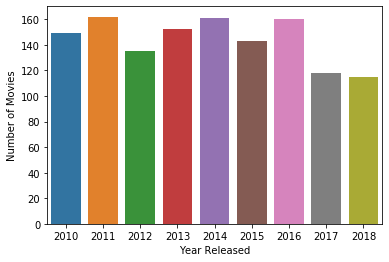

In [66]:
ax = sns.barplot(x='year', y='movie_name', data = movies_by_year)
ax.set(xlabel='Year Released', ylabel='Number of Movies')
plt.show()

## Number of White and Non-White Actors and Actresses by Year

In [67]:
count_by_ethnicity = df.groupby(['year', 'ethnicity']).count()

In [68]:
count_by_ethnicity.reset_index(inplace=True)

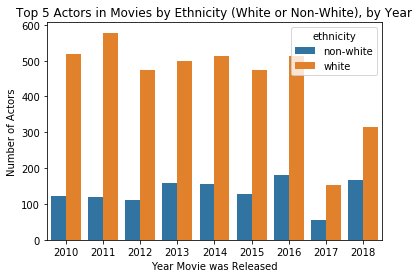

In [69]:
ax = sns.barplot(x='year', y='movie_name', hue='ethnicity', data = count_by_ethnicity)
ax.set(xlabel='Year Movie was Released', ylabel='Number of Actors')
plt.title('Top 5 Actors in Movies by Ethnicity (White or Non-White), by Year')
plt.show()

## Number of White and Non-White Actors and Actresses by Year

In [70]:
mean_by_year_ethnicity = df.groupby(['year', 'ethnicity']).mean()

In [71]:
mean_by_year_ethnicity.reset_index(inplace=True)

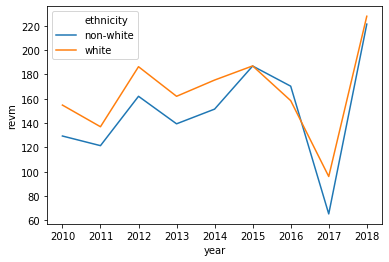

In [72]:
sns.lineplot(x='year', y='revm', hue='ethnicity', data=mean_by_year_ethnicity)

In [73]:
df['rev_over_bud'] = df['revm']/df['budgetm']

In [74]:
revised_df = df[df.movie_name != 'Nurse 3-D']

In [75]:
revised_df = revised_df[revised_df.movie_name != 'From Prada to Nada']

In [76]:
mean_by_year_ethnicity = revised_df.groupby(['year', 'ethnicity']).mean()

In [77]:
mean_by_year_ethnicity.reset_index(inplace=True)

In [78]:
# revised_df[(revised_df['year']==2011) & (revised_df['rev_over_bud'] > 10)]

In [79]:
# mean_by_year_ethnicity

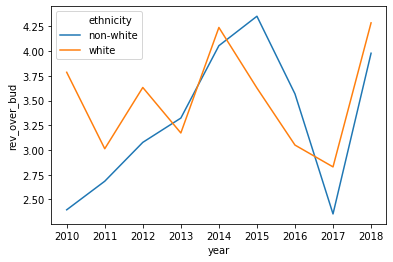

In [80]:
sns.lineplot(x='year', y='rev_over_bud', hue='ethnicity', data=mean_by_year_ethnicity)

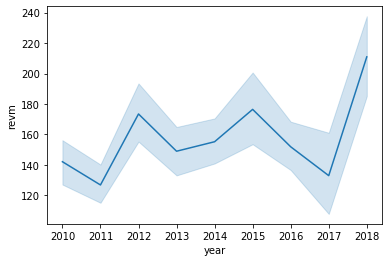

In [81]:
sns.lineplot(x = 'year', y = 'revm', data=df)

In [82]:
revised_df['made_money'] = revised_df['rev_over_bud'].apply(lambda x: True if x > 1 else False) 

In [83]:
revised_df

,movie_name,budget,revenue,release_date,vote_average,vote_count,runtime,production_country,language,actor_name,ethnicity,budgetm,revm,year,rev_over_bud,made_money
0,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Jessica Alba,non-white,65.000000,39.407616,2014,0.606271,False
1,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Joseph Gordon-Levitt,white,65.000000,39.407616,2014,0.606271,False
2,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Josh Brolin,white,65.000000,39.407616,2014,0.606271,False
3,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Mickey Rourke,white,65.000000,39.407616,2014,0.606271,False
4,Sin City: A Dame to Kill For,65000000.0,3.940762e+07,2014-08-20,6.3,2314,102.0,US,en,Rosario Dawson,non-white,65.000000,39.407616,2014,0.606271,False
5,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Chris Evans,white,140.000000,370.569774,2011,2.646927,True
6,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hayley Atwell,white,140.000000,370.569774,2011,2.646927,True
7,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Hugo Weaving,non-white,140.000000,370.569774,2011,2.646927,True
8,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Sebastian Stan,white,140.000000,370.569774,2011,2.646927,True
9,Captain America: The First Avenger,140000000.0,3.705698e+08,2011-07-22,6.9,13443,124.0,US,en,Tommy Lee Jones,white,140.000000,370.569774,2011,2.646927,True


In [84]:
avg_by_year_ethnicity = revised_df.groupby(['year', 'ethnicity']).mean()

In [85]:
avg_by_year_ethnicity.reset_index(inplace=True)

[]

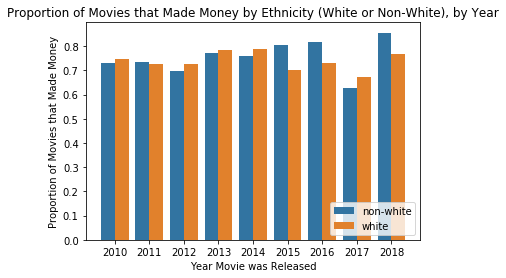

In [86]:
ax = sns.barplot(x='year', y='made_money', hue='ethnicity', data=avg_by_year_ethnicity)
plt.legend(loc = 'lower right')
ax.set(xlabel='Year Movie was Released', ylabel='Proportion of Movies that Made Money')
plt.title('Proportion of Movies that Made Money by Ethnicity (White or Non-White), by Year')
plt.plot()

In [87]:
amount_spend_on_failed_movies = revised_df.groupby(['movie_name', 'year', 'made_money']).mean()

In [88]:
abc = amount_spend_on_failed_movies.groupby(['year', 'made_money']).sum()

In [89]:
# abc

In [90]:
abc.reset_index(inplace=True)

In [91]:
lost_money = abc[abc['made_money']==True]

In [92]:
lost_money

,year,made_money,budget,revenue,vote_average,vote_count,runtime,budgetm,revm,rev_over_bud
1,2010,True,6.733318e+09,2.065046e+10,700.1,303345,11821.0,6733.317650,20650.459367,623.996411
3,2011,True,6.340020e+09,1.997881e+10,736.8,286653,12556.0,6340.020202,19978.809855,510.513915
5,2012,True,6.244300e+09,2.277952e+10,628.8,345039,10782.0,6244.300000,22779.516807,551.318839
7,2013,True,6.597420e+09,2.201218e+10,740.0,383309,12730.0,6597.420000,22012.184264,454.558909
9,2014,True,6.691800e+09,2.453264e+10,801.7,422297,13551.0,6691.800000,24532.639531,705.220223
11,2015,True,5.974600e+09,2.464408e+10,671.6,367197,11697.0,5974.600003,24644.078985,976.677504
13,2016,True,6.987900e+09,2.367768e+10,769.8,404927,13053.0,6987.900000,23677.684153,507.995143
15,2017,True,6.524500e+09,2.587521e+10,646.7,376225,11047.0,6524.500000,25875.210357,514.601751
17,2018,True,5.741628e+09,2.377909e+10,599.0,254288,10199.0,5741.628355,23779.088892,515.714273


In [93]:
cnx = mysql.connector.connect(
host = config.host,
user = config.user,
password = config.password,
database = config.database)
c = cnx.cursor()    
c.execute("""SELECT * from details
JOIN genre
ON details.id = genre.id;""")
df = pd.DataFrame(c.fetchall())
df.head()
df.columns = [x[0] for x in c.description]
cnx.commit()
c.close()

True

In [94]:
revised_df = df[df.name != 'Nurse 3-D']

In [95]:
revised_df = revised_df[revised_df.name != 'From Prada to Nada']

In [96]:
revised_df['revm'] = revised_df['revenue'].map(lambda x :x/1000000)

In [97]:
revised_df['budgetm'] = revised_df['budget'].map(lambda x :x/1000000)

In [98]:
revised_df['year'] = revised_df['release_date'].map(lambda x : x.year)

In [99]:
revised_df = revised_df[revised_df.budgetm >= 1]

In [100]:
revised_df['rev_over_bud'] = revised_df['revm']/revised_df['budgetm']

In [101]:
revised_df = revised_df[revised_df.language == 'en']

In [102]:
revised_df = revised_df[revised_df.production_country == 'US']

In [103]:
revised_df[revised_df['rev_over_bud'] > 100]

,id,imdb_id,name,budget,revenue,popularity,release_date,vote_average,vote_count,runtime,production_country,language,id,genre,revm,budgetm,year,rev_over_bud
807,76487,tt1560985,The Devil Inside,1000000.0,101758490.0,7.079,2012-01-06,4.7,458,83.0,US,en,76487,Horror,101.75849,1.0,2012,101.75849


In [104]:
mean_by_genre = revised_df.groupby('genre').mean()

In [105]:
mean_by_genre.reset_index(inplace=True)

In [106]:
mean_by_genre

,genre,id,budget,revenue,popularity,vote_average,vote_count,runtime,id,revm,budgetm,year,rev_over_bud
0,Action,249146.873786,7.248233e+07,2.353815e+08,17.050476,6.275728,3386.417476,113.339806,249146.873786,235.381491,72.482328,2015.058252,2.490798
1,Adventure,223715.291139,1.029557e+08,3.690562e+08,18.673532,6.513924,4704.291139,112.949367,223715.291139,369.056163,102.955696,2015.113924,3.167979
2,Animation,287107.850000,7.911351e+07,2.969748e+08,13.215800,6.345000,2045.600000,94.700000,287107.850000,296.974834,79.113510,2016.300000,3.237802
3,Comedy,223122.469194,4.325726e+07,1.525734e+08,12.956445,6.139336,2057.957346,103.080569,223122.469194,152.573364,43.257257,2014.322275,3.294865
4,Crime,192887.581395,3.792581e+07,9.700149e+07,14.330349,6.260465,2256.906977,109.488372,192887.581395,97.001490,37.925814,2013.895349,2.260977
5,Documentary,208092.666667,3.000000e+06,3.572947e+06,8.109333,7.633333,380.000000,109.333333,208092.666667,3.572947,3.000000,2013.000000,1.628289
6,Drama,234819.108303,2.746208e+07,6.938865e+07,11.735473,6.583755,1719.552347,112.202166,234819.108303,69.388653,27.462084,2014.364621,2.988409
7,Family,192508.686747,8.406627e+07,3.099189e+08,14.615554,6.448193,2784.891566,100.060241,192508.686747,309.918900,84.066265,2014.108434,3.229899
8,Fantasy,199632.823529,1.116529e+08,3.658590e+08,17.535929,6.318824,4231.470588,112.705882,199632.823529,365.859033,111.652941,2014.670588,3.154765
9,History,255807.931034,3.098896e+07,6.187999e+07,12.661759,6.824138,1905.827586,125.517241,255807.931034,61.879986,30.988956,2014.862069,2.331888


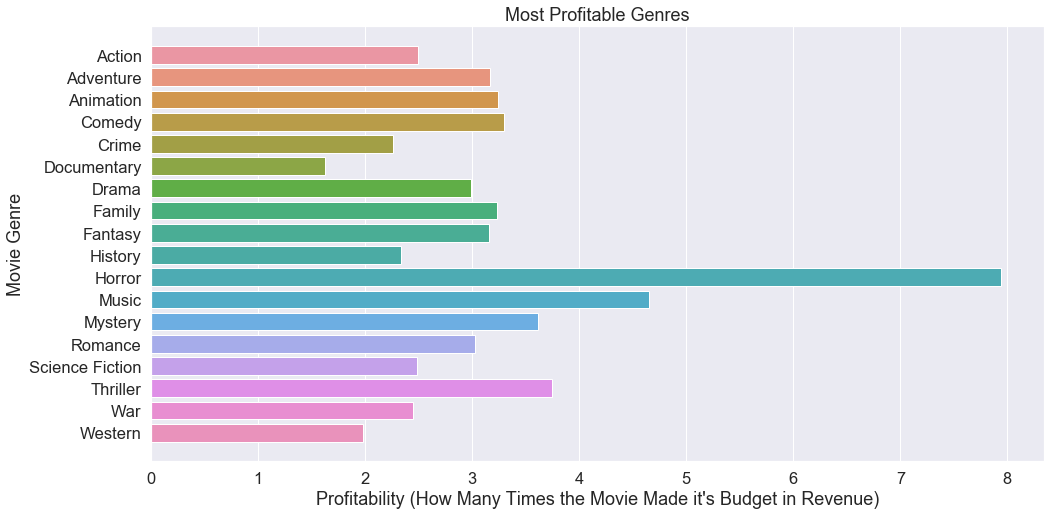

In [107]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='genre', x='rev_over_bud', data=mean_by_genre)
ax.set(xlabel='Profitability (How Many Times the Movie Made it\'s Budget in Revenue)', ylabel='Movie Genre')
plt.title('Most Profitable Genres')
# plt.legend()
plt.plot();

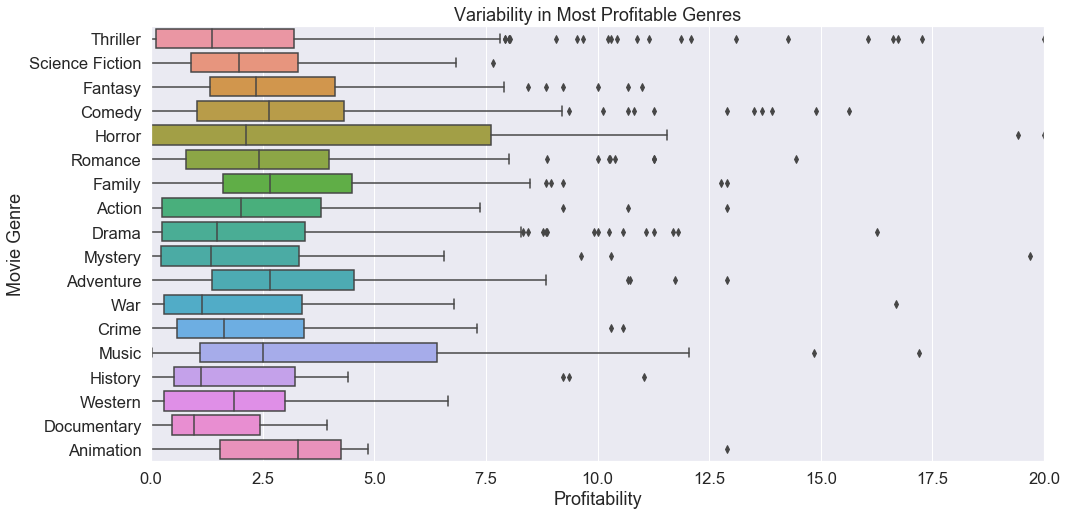

In [108]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.boxplot(y='genre', x='rev_over_bud', data=revised_df)
ax.set(xlabel='Profitability', ylabel='Movie Genre')
ax.set(xlim=(0, 20))
plt.title('Variability in Most Profitable Genres')
plt.plot();

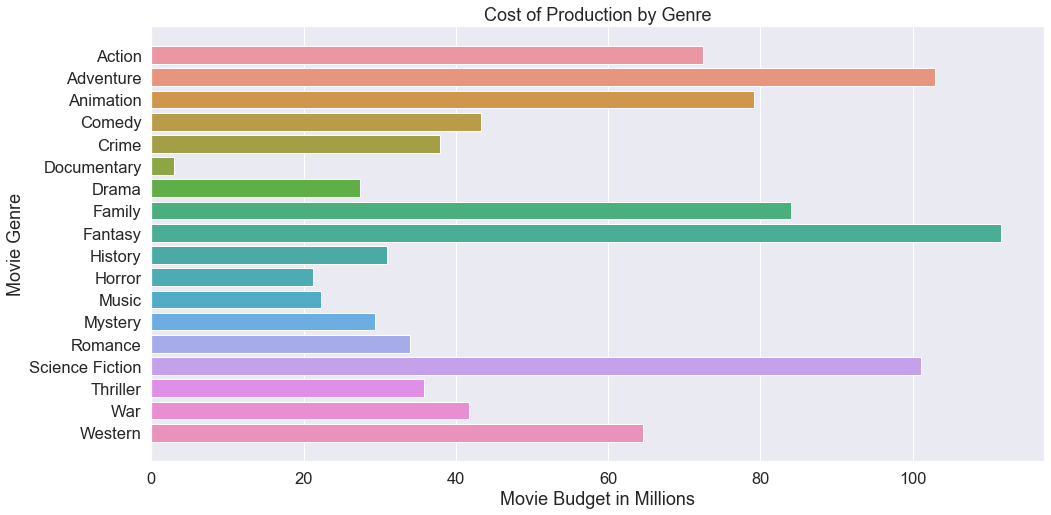

In [109]:
sns.set(font_scale=1.5) 
plt.figure(figsize=(16, 8))
ax = sns.barplot(y='genre', x='budgetm', data=mean_by_genre)
ax.set(xlabel='Movie Budget in Millions', ylabel='Movie Genre')
plt.title('Cost of Production by Genre')
# plt.legend()
plt.plot();